# 制作元数据 df

In [1]:
import h5py

with h5py.File('/home/youliang/youliang_data2/bp/kailuan_dataset.h5', 'r') as f:
    def print_structure(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f'{name}: shape={obj.shape}, dtype={obj.dtype}')
        else:
            print(f'{name}/')
    
    print('HDF5 Structure:')
    print('=' * 60)
    f.visititems(print_structure)

HDF5 Structure:
metadata/
metadata/abdomen_circumference: shape=(18834,), dtype=float32
metadata/age: shape=(18834,), dtype=float32
metadata/bmi: shape=(18834,), dtype=float32
metadata/ecg_length: shape=(18834,), dtype=float32
metadata/height: shape=(18834,), dtype=float32
metadata/lbaPWV: shape=(18834,), dtype=float32
metadata/left_arm_dbp: shape=(18834,), dtype=float32
metadata/left_arm_mbp: shape=(18834,), dtype=float32
metadata/left_arm_pp: shape=(18834,), dtype=float32
metadata/left_arm_sbp: shape=(18834,), dtype=float32
metadata/name: shape=(18834,), dtype=object
metadata/new_id: shape=(18834,), dtype=object
metadata/ppg_length: shape=(18834,), dtype=float32
metadata/rbaPWV: shape=(18834,), dtype=float32
metadata/record_time: shape=(18834,), dtype=object
metadata/right_arm_dbp: shape=(18834,), dtype=float32
metadata/right_arm_mbp: shape=(18834,), dtype=float32
metadata/right_arm_pp: shape=(18834,), dtype=float32
metadata/right_arm_sbp: shape=(18834,), dtype=float32
metadata/sex: 

In [2]:
import h5py
import pandas as pd

with h5py.File('/home/youliang/youliang_data2/bp/kailuan_dataset.h5', 'r') as f:
    df = pd.DataFrame({
        'name': f['metadata/name'][:],
        'age': f['metadata/age'][:],
        'sex': f['metadata/sex'][:]
    })

# Decode bytes if needed
for col in ['name', 'sex']:
    if df[col].dtype == object:
        df[col] = df[col].apply(lambda x: x.decode() if isinstance(x, bytes) else x)

# Create unique person identifier
df['person_uid'] = df['name'].astype(str) + '_' + df['sex'].astype(str) + '_' + df['age'].astype(int).astype(str)

print(f"Total records: {len(df)}")
print(f"Unique people (name+sex+age): {df['person_uid'].nunique()}")
print(f"\nRecords per person:")
print(df['person_uid'].value_counts().describe())

Total records: 18834
Unique people (name+sex+age): 17104

Records per person:
count    17104.000000
mean         1.101146
std          0.345282
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: count, dtype: float64


In [4]:
print(df['person_uid'].value_counts().quantile([0.9,0.95, 0.99, 1.0]))


0.90    1.0
0.95    2.0
0.99    3.0
1.00    6.0
Name: count, dtype: float64


In [1]:
import h5py

with h5py.File('/home/youliang/youliang_data2/bp/kailuan_dataset.h5', 'r') as f:
    ecg = f['signals']['ecg']
    ppg = f['signals']['ppg']
    print("ECG shape:", ecg.shape)
    print("PPG shape:", ppg.shape)
    print("单条 ECG 长度:", ecg[0].shape)
    print("单条 PPG 长度:", ppg[0].shape)

ECG shape: (18834,)
PPG shape: (18834,)
单条 ECG 长度: (3630,)
单条 PPG 长度: (4230,)


In [11]:
import numpy as np
from pathlib import Path

npz_dir = Path('/home/youliang/youliang_data2/bp/bp_npz_run1/npz')
bad_files = []
for f in npz_dir.glob('*.npz'):
    d = np.load(f)
    x = d['x']
    if np.isnan(x).any() or np.isinf(x).any():
        bad_files.append(f.name)
        print(f"BAD: {f.name}, nan={np.isnan(x).sum()}, inf={np.isinf(x).sum()}")

print(f"\nTotal bad files: {len(bad_files)}")

BAD: 6517262_20240311_082837_DONGYING_68_170_Female_64.0_97_22.1_2536_2435_145_98_54_91_143_91_71_72.npz, nan=7500, inf=0

Total bad files: 1


In [ ]:
# import os
# import json
# from pathlib import Path

# def count_json_files(directory):
#     """Count all JSON files in directory and subdirectories"""
#     json_files = []
    
#     for root, dirs, files in os.walk(directory):
#         for file in files:
#             if file.endswith('.json'):
#                 full_path = os.path.join(root, file)
#                 json_files.append(full_path)
    
#     return json_files

# # Set the directory path
# base_dir = "/home/youliang/youliang_data2/bp/kailuan_data/version_251116"

# print(f"Searching for JSON files in: {base_dir}\n")

# # Count JSON files
# json_files = count_json_files(base_dir)

# print(f"Total JSON files found: {len(json_files)}")
# print(f"\nFirst 10 files:")
# for i, file in enumerate(json_files[:10], 1):
#     print(f"{i}. {file}")

# if len(json_files) > 10:
#     print(f"\n... and {len(json_files) - 10} more files")

In [ ]:
# import os
# import json
# import pandas as pd
# from pathlib import Path

# def extract_metadata(base_dir):
#     """Extract metadata from all manifest.json files"""
    
#     metadata_list = []
#     missing_files = []
    
#     # Walk through all directories
#     for root, dirs, files in os.walk(base_dir):
#         if 'manifest.json' in files:
#             manifest_path = os.path.join(root, 'manifest.json')
            
#             try:
#                 with open(manifest_path, 'r', encoding='utf-8') as f:
#                     data = json.load(f)
                
#                 # Extract uid information
#                 uid_info = data.get('uid', {})
#                 new_id = uid_info.get('new_id', '')
                
#                 # Construct file paths
#                 sample_dir = os.path.dirname(manifest_path)
#                 ecg_path = os.path.join(sample_dir, 'ecg', 'txt', f"{new_id}_{uid_info.get('name', '')}.txt")
#                 ppg_path = os.path.join(sample_dir, 'ppg', 'txt', f"{new_id}_{uid_info.get('name', '')}.txt")
                
#                 # Check if files exist
#                 ecg_exists = os.path.exists(ecg_path)
#                 ppg_exists = os.path.exists(ppg_path)
                
#                 if not ecg_exists or not ppg_exists:
#                     missing_files.append({
#                         'new_id': new_id,
#                         'ecg_exists': ecg_exists,
#                         'ppg_exists': ppg_exists
#                     })
                
#                 # Create metadata entry
#                 metadata = {
#                     'new_id': new_id,
#                     'uid': uid_info.get('uid', ''),
#                     'record_time': uid_info.get('record_time_str', ''),
#                     'name': uid_info.get('name', ''),
#                     'age': uid_info.get('age', ''),
#                     'height': uid_info.get('height', ''),
#                     'sex': uid_info.get('sex', ''),
#                     'weight': uid_info.get('weight', ''),
#                     'abdomen_circumference': uid_info.get('abdomen_circumference', ''),
#                     'bmi': uid_info.get('bmi', ''),
#                     'lbaPWV': uid_info.get('lbaPWV', ''),
#                     'rbaPWV': uid_info.get('rbaPWV', ''),
#                     'right_arm_sbp': uid_info.get('right_arm_sbp', ''),
#                     'right_arm_mbp': uid_info.get('right_arm_mbp', ''),
#                     'right_arm_dbp': uid_info.get('right_arm_dbp', ''),
#                     'right_arm_pp': uid_info.get('right_arm_pp', ''),
#                     'left_arm_sbp': uid_info.get('left_arm_sbp', ''),
#                     'left_arm_mbp': uid_info.get('left_arm_mbp', ''),
#                     'left_arm_dbp': uid_info.get('left_arm_dbp', ''),
#                     'left_arm_pp': uid_info.get('left_arm_pp', ''),
#                     'has_issue': uid_info.get('has_issue', False),
#                     'ecg_ok': data.get('ecg', {}).get('ok', False),
#                     'ppg_ok': data.get('ppg', {}).get('ok', False),
#                     'manifest_path': manifest_path,
#                     'ecg_path': ecg_path,
#                     'ppg_path': ppg_path,
#                     'ecg_exists': ecg_exists,
#                     'ppg_exists': ppg_exists
#                 }
                
#                 metadata_list.append(metadata)
                
#             except Exception as e:
#                 print(f"Error processing {manifest_path}: {e}")
    
#     return metadata_list, missing_files

# # Main execution
# base_dir = "/home/youliang/youliang_data2/bp/kailuan_data/version_251116"
# print(f"Extracting metadata from: {base_dir}\n")

# metadata_list, missing_files = extract_metadata(base_dir)

# # Create DataFrame
# df = pd.DataFrame(metadata_list)

# # Save to CSV
# output_csv = "kailuan_metadata.csv"
# df.to_csv(output_csv, index=False)

# print(f"✓ Total samples: {len(df)}")
# print(f"✓ Metadata saved to: {output_csv}")
# print(f"\nData summary:")
# print(f"  - Samples with ECG: {df['ecg_exists'].sum()}")
# print(f"  - Samples with PPG: {df['ppg_exists'].sum()}")
# print(f"  - Samples with both: {(df['ecg_exists'] & df['ppg_exists']).sum()}")
# print(f"  - Sex distribution: {df['sex'].value_counts().to_dict()}")
# print(f"  - Age range: {df['age'].astype(float).min():.0f} - {df['age'].astype(float).max():.0f}")

# if missing_files:
#     print(f"\n⚠ Warning: {len(missing_files)} samples have missing signal files")

# print(f"\nFirst 5 rows preview:")
# print(df[['new_id', 'age', 'sex', 'right_arm_sbp', 'right_arm_dbp', 'ecg_exists', 'ppg_exists']].head())

# 可视化

In [ ]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from collections import Counter
# import random

# def read_signal_file(filepath):
#     """Read signal file and return as array"""
#     try:
#         with open(filepath, 'r') as f:
#             lines = f.readlines()
#             # Remove empty lines and convert to float
#             signal = [float(line.strip()) for line in lines if line.strip()]
#         return np.array(signal)
#     except Exception as e:
#         print(f"Error reading {filepath}: {e}")
#         return None

# def check_all_signals(metadata_csv):
#     """Check length of all signal files"""
    
#     df = pd.read_csv(metadata_csv)
    
#     ecg_lengths = []
#     ppg_lengths = []
    
#     print(f"Checking {len(df)} samples...\n")
    
#     for idx, row in df.iterrows():
#         if idx % 1000 == 0:
#             print(f"Progress: {idx}/{len(df)}")
        
#         # Check ECG
#         if row['ecg_exists'] and pd.notna(row['ecg_path']) and os.path.exists(row['ecg_path']):
#             signal = read_signal_file(row['ecg_path'])
#             if signal is not None:
#                 ecg_lengths.append(len(signal))
        
#         # Check PPG
#         if row['ppg_exists'] and pd.notna(row['ppg_path']) and os.path.exists(row['ppg_path']):
#             signal = read_signal_file(row['ppg_path'])
#             if signal is not None:
#                 ppg_lengths.append(len(signal))
    
#     return ecg_lengths, ppg_lengths, df

# def plot_random_signals(df, n_samples=6):
#     """Plot random signal samples"""
    
#     # Filter valid samples
#     valid_samples = df[(df['ecg_exists']) & (df['ppg_exists'])].copy()
    
#     if len(valid_samples) < n_samples:
#         n_samples = len(valid_samples)
    
#     # Randomly select samples
#     selected = valid_samples.sample(n=n_samples, random_state=42)
    
#     fig, axes = plt.subplots(n_samples, 2, figsize=(14, 3*n_samples))
#     if n_samples == 1:
#         axes = axes.reshape(1, -1)
    
#     for idx, (i, row) in enumerate(selected.iterrows()):
#         # Read ECG
#         ecg_signal = read_signal_file(row['ecg_path'])
#         if ecg_signal is not None:
#             axes[idx, 0].plot(ecg_signal, linewidth=0.5)
#             axes[idx, 0].set_title(f"ECG - {row['new_id'][:30]}...\nLen: {len(ecg_signal)}, BP: {row['right_arm_sbp']}/{row['right_arm_dbp']}")
#             axes[idx, 0].set_ylabel('Amplitude')
#             axes[idx, 0].grid(True, alpha=0.3)
        
#         # Read PPG
#         ppg_signal = read_signal_file(row['ppg_path'])
#         if ppg_signal is not None:
#             axes[idx, 1].plot(ppg_signal, linewidth=0.5, color='red')
#             axes[idx, 1].set_title(f"PPG - {row['new_id'][:30]}...\nLen: {len(ppg_signal)}, BP: {row['right_arm_sbp']}/{row['right_arm_dbp']}")
#             axes[idx, 1].set_ylabel('Amplitude')
#             axes[idx, 1].grid(True, alpha=0.3)
    
#     axes[-1, 0].set_xlabel('Sample Index')
#     axes[-1, 1].set_xlabel('Sample Index')
#     plt.tight_layout()
#     plt.savefig('random_signals_visualization.png', dpi=150, bbox_inches='tight')
#     print(f"\n✓ Saved visualization to: random_signals_visualization.png")
#     plt.show()

# # Main execution
# metadata_csv = "kailuan_metadata.csv"

# print("=" * 60)
# print("KAILUAN DATASET SIGNAL FILE ANALYSIS")
# print("=" * 60)

# # Check all signal lengths
# ecg_lengths, ppg_lengths, df = check_all_signals(metadata_csv)

# # Analyze ECG lengths
# print("\n" + "=" * 60)
# print("ECG SIGNAL LENGTHS")
# print("=" * 60)
# ecg_counter = Counter(ecg_lengths)
# print(f"Total ECG files: {len(ecg_lengths)}")
# print(f"Unique lengths: {len(ecg_counter)}")
# print(f"Most common lengths:")
# for length, count in ecg_counter.most_common(10):
#     print(f"  {length:8d} samples: {count:6d} files ({count/len(ecg_lengths)*100:.2f}%)")

# print(f"\nECG Statistics:")
# print(f"  Min: {min(ecg_lengths)}")
# print(f"  Max: {max(ecg_lengths)}")
# print(f"  Mean: {np.mean(ecg_lengths):.2f}")
# print(f"  Median: {np.median(ecg_lengths):.2f}")
# print(f"  Std: {np.std(ecg_lengths):.2f}")

# # Analyze PPG lengths
# print("\n" + "=" * 60)
# print("PPG SIGNAL LENGTHS")
# print("=" * 60)
# ppg_counter = Counter(ppg_lengths)
# print(f"Total PPG files: {len(ppg_lengths)}")
# print(f"Unique lengths: {len(ppg_counter)}")
# print(f"Most common lengths:")
# for length, count in ppg_counter.most_common(10):
#     print(f"  {length:8d} samples: {count:6d} files ({count/len(ppg_lengths)*100:.2f}%)")

# print(f"\nPPG Statistics:")
# print(f"  Min: {min(ppg_lengths)}")
# print(f"  Max: {max(ppg_lengths)}")
# print(f"  Mean: {np.mean(ppg_lengths):.2f}")
# print(f"  Median: {np.median(ppg_lengths):.2f}")
# print(f"  Std: {np.std(ppg_lengths):.2f}")

# # Plot random samples
# print("\n" + "=" * 60)
# print("VISUALIZING RANDOM SAMPLES")
# print("=" * 60)
# plot_random_signals(df, n_samples=6)

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from collections import Counter

# def read_signal_file(filepath):
#     """Read signal file"""
#     try:
#         with open(filepath, 'r') as f:
#             lines = f.readlines()
#             signal = [float(line.strip()) for line in lines if line.strip()]
#         return np.array(signal)
#     except:
#         return None

# def detect_calibration_end(signal, method='gradient'):
#     """
#     Detect where calibration signal ends using multiple methods
#     """
#     if signal is None or len(signal) < 100:
#         return None
    
#     # Method 1: Gradient-based detection
#     # Calibration has very low variance, real ECG has high variance
#     window_size = 50
#     variances = []
#     for i in range(0, min(1000, len(signal) - window_size)):
#         window = signal[i:i+window_size]
#         variances.append(np.var(window))
    
#     # Find where variance suddenly increases (real ECG starts)
#     variances = np.array(variances)
#     threshold = np.mean(variances[:200]) + 2 * np.std(variances[:200])
    
#     for i in range(len(variances)):
#         if variances[i] > threshold:
#             return i
    
#     return None

# def analyze_calibration_lengths(metadata_csv, n_samples=100):
#     """Analyze calibration signal lengths across multiple samples"""
    
#     df = pd.read_csv(metadata_csv)
#     valid_samples = df[df['ecg_exists']].copy()
    
#     # Sample random files
#     if len(valid_samples) > n_samples:
#         sampled = valid_samples.sample(n=n_samples, random_state=42)
#     else:
#         sampled = valid_samples
    
#     calibration_ends = []
    
#     print(f"Analyzing {len(sampled)} ECG files for calibration signals...\n")
    
#     for idx, (i, row) in enumerate(sampled.iterrows()):
#         if idx % 20 == 0:
#             print(f"Progress: {idx}/{len(sampled)}")
        
#         signal = read_signal_file(row['ecg_path'])
#         if signal is not None:
#             cal_end = detect_calibration_end(signal)
#             if cal_end is not None:
#                 calibration_ends.append(cal_end)
    
#     return calibration_ends, sampled

# def visualize_calibration_detection(df, n_show=6):
#     """Visualize calibration detection on random samples"""
    
#     sampled = df.sample(n=n_show, random_state=123)
    
#     fig, axes = plt.subplots(n_show, 1, figsize=(14, 2.5*n_show))
#     if n_show == 1:
#         axes = [axes]
    
#     for idx, (i, row) in enumerate(sampled.iterrows()):
#         signal = read_signal_file(row['ecg_path'])
#         if signal is not None:
#             cal_end = detect_calibration_end(signal)
            
#             # Plot first 1500 samples
#             plot_len = min(1500, len(signal))
#             axes[idx].plot(signal[:plot_len], linewidth=0.8, alpha=0.8)
            
#             # if cal_end is not None:
#             #     axes[idx].axvline(cal_end, color='red', linestyle='--', 
#             #                     linewidth=2, label=f'Detected end: {cal_end}')
#             #     axes[idx].axvspan(0, cal_end, alpha=0.2, color='yellow', 
#             #                     label='Calibration region')
            
#             axes[idx].set_title(f"{row['new_id'][:50]}... | BP: {row['right_arm_sbp']}/{row['right_arm_dbp']}")
#             axes[idx].set_ylabel('Amplitude')
#             axes[idx].legend(loc='upper right')
#             axes[idx].grid(True, alpha=0.3)
    
#     axes[-1].set_xlabel('Sample Index')
#     plt.tight_layout()
#     plt.savefig('calibration_detection.png', dpi=150, bbox_inches='tight')
#     print(f"\n✓ Saved visualization to: calibration_detection.png")
#     plt.show()

# # Main execution
# metadata_csv = "kailuan_metadata.csv"

# print("=" * 70)
# print("ECG CALIBRATION SIGNAL ANALYSIS")
# print("=" * 70)

# # Analyze calibration lengths
# calibration_ends, sampled_df = analyze_calibration_lengths(metadata_csv, n_samples=200)

# if len(calibration_ends) > 0:
#     print("\n" + "=" * 70)
#     print("CALIBRATION SIGNAL LENGTH STATISTICS")
#     print("=" * 70)
    
#     cal_counter = Counter(calibration_ends)
#     print(f"Successfully detected: {len(calibration_ends)} / {len(sampled_df)} files")
#     print(f"\nMost common calibration lengths:")
#     for length, count in cal_counter.most_common(15):
#         print(f"  {length:6d} samples: {count:4d} occurrences ({count/len(calibration_ends)*100:.1f}%)")
    
#     print(f"\nStatistics:")
#     print(f"  Min:    {min(calibration_ends)}")
#     print(f"  Max:    {max(calibration_ends)}")
#     print(f"  Mean:   {np.mean(calibration_ends):.1f}")
#     print(f"  Median: {np.median(calibration_ends):.1f}")
#     print(f"  Std:    {np.std(calibration_ends):.1f}")
    
#     # Recommend threshold
#     recommended = int(np.percentile(calibration_ends, 75))
#     print(f"\n" + "=" * 70)
#     print(f"RECOMMENDATION: Use threshold = {recommended} samples")
#     print(f"This covers {np.sum(np.array(calibration_ends) <= recommended)/len(calibration_ends)*100:.1f}% of detected calibrations")
#     print("=" * 70)
    
#     # Visualize
#     print(f"\nVisualizing calibration detection on random samples...")
#     visualize_calibration_detection(sampled_df, n_show=6)
# else:
#     print("\n⚠ Warning: No calibration signals detected!")

# 制作hdf5 文件

In [24]:
# import pandas as pd
# import numpy as np
# import h5py
# import os
# from tqdm import tqdm

# def read_signal_file(filepath):
#     """Read signal file"""
#     try:
#         with open(filepath, 'r') as f:
#             lines = f.readlines()
#             signal = [float(line.strip()) for line in lines if line.strip()]
#         return np.array(signal, dtype=np.float32)
#     except:
#         return None

# def extract_and_save_hdf5(metadata_csv, output_path="kailuan_dataset.h5", calibration_threshold=600):
#     """
#     Extract signals and save to HDF5 format (most efficient for large numerical data)
#     """
    
#     print("=" * 70)
#     print(f"CREATING HDF5 DATASET (ECG calibration threshold: {calibration_threshold})")
#     print("=" * 70)
    
#     # Load metadata
#     df = pd.read_csv(metadata_csv)
#     print(f"\nTotal samples in metadata: {len(df)}")
    
#     # Filter samples with both ECG and PPG
#     valid_df = df[(df['ecg_exists']) & (df['ppg_exists'])].copy()
#     print(f"Samples with both ECG & PPG: {len(valid_df)}")
    
#     # First pass: collect signals and metadata
#     ecg_signals = []
#     ppg_signals = []
#     metadata_records = []
    
#     print(f"\nProcessing signals...")
    
#     for idx, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
#         # Read ECG and remove calibration
#         ecg = read_signal_file(row['ecg_path'])
#         if ecg is not None and len(ecg) > calibration_threshold:
#             ecg_clean = ecg[calibration_threshold:]
#         else:
#             ecg_clean = None
        
#         # Read PPG
#         ppg = read_signal_file(row['ppg_path'])
        
#         # Only keep if both signals are valid
#         if ecg_clean is not None and ppg is not None:
#             ecg_signals.append(ecg_clean)
#             ppg_signals.append(ppg)
            
#             # Collect metadata
#             metadata_records.append({
#                 'new_id': row['new_id'],
#                 'uid': row['uid'],
#                 'record_time': row['record_time'],
#                 'name': row['name'],
#                 'age': float(row['age']),
#                 'height': float(row['height']),
#                 'weight': float(row['weight']),
#                 'sex': row['sex'],
#                 'sex_encoded': 1 if row['sex'] == 'Male' else 0,
#                 'bmi': float(row['bmi']),
#                 'abdomen_circumference': float(row['abdomen_circumference']) if pd.notna(row['abdomen_circumference']) else np.nan,
#                 'lbaPWV': float(row['lbaPWV']) if pd.notna(row['lbaPWV']) else np.nan,
#                 'rbaPWV': float(row['rbaPWV']) if pd.notna(row['rbaPWV']) else np.nan,
#                 'right_arm_sbp': float(row['right_arm_sbp']),
#                 'right_arm_dbp': float(row['right_arm_dbp']),
#                 'right_arm_mbp': float(row['right_arm_mbp']),
#                 'right_arm_pp': float(row['right_arm_pp']),
#                 'left_arm_sbp': float(row['left_arm_sbp']),
#                 'left_arm_dbp': float(row['left_arm_dbp']),
#                 'left_arm_mbp': float(row['left_arm_mbp']),
#                 'left_arm_pp': float(row['left_arm_pp']),
#                 'ecg_length': len(ecg_clean),
#                 'ppg_length': len(ppg),
#             })
    
#     n_samples = len(metadata_records)
#     print(f"\n✓ Successfully processed: {n_samples} samples")
    
#     # Save to HDF5
#     print(f"\nSaving to HDF5 format...")
    
#     with h5py.File(output_path, 'w') as f:
#         # Create groups
#         signals_group = f.create_group('signals')
#         metadata_group = f.create_group('metadata')
        
#         # Save signals as variable-length datasets (most efficient for variable-length data)
#         dt = h5py.vlen_dtype(np.dtype('float32'))
        
#         ecg_dataset = signals_group.create_dataset('ecg', (n_samples,), dtype=dt)
#         ppg_dataset = signals_group.create_dataset('ppg', (n_samples,), dtype=dt)
        
#         print("  Writing signals...")
#         for i in tqdm(range(n_samples)):
#             ecg_dataset[i] = ecg_signals[i]
#             ppg_dataset[i] = ppg_signals[i]
        
#         # Save metadata as structured arrays (most efficient)
#         print("  Writing metadata...")
        
#         # Numeric metadata
#         numeric_fields = ['age', 'height', 'weight', 'sex_encoded', 'bmi', 
#                          'abdomen_circumference', 'lbaPWV', 'rbaPWV',
#                          'right_arm_sbp', 'right_arm_dbp', 'right_arm_mbp', 'right_arm_pp',
#                          'left_arm_sbp', 'left_arm_dbp', 'left_arm_mbp', 'left_arm_pp',
#                          'ecg_length', 'ppg_length']
        
#         for field in numeric_fields:
#             data = np.array([r[field] for r in metadata_records], dtype=np.float32)
#             metadata_group.create_dataset(field, data=data, compression='gzip')
        
#         # String metadata
#         string_fields = ['new_id', 'uid', 'record_time', 'name', 'sex']
#         for field in string_fields:
#             data = np.array([r[field] for r in metadata_records], dtype=h5py.string_dtype())
#             metadata_group.create_dataset(field, data=data, compression='gzip')
        
#         # Add attributes
#         f.attrs['n_samples'] = n_samples
#         f.attrs['calibration_threshold'] = calibration_threshold
#         f.attrs['created'] = pd.Timestamp.now().isoformat()
    
#     file_size = os.path.getsize(output_path) / 1024 / 1024
#     print(f"\n✓ Saved HDF5 dataset: {output_path} ({file_size:.2f} MB)")
    
#     return output_path, n_samples, metadata_records

# def print_usage_example(output_path):
#     """Print usage examples"""
    
#     print("\n" + "=" * 70)
#     print("USAGE EXAMPLE")
#     print("=" * 70)
#     print(f"""
# import h5py
# import numpy as np

# # Open dataset (read-only, memory efficient)
# with h5py.File('{output_path}', 'r') as f:
#     print(f"Total samples: {{f.attrs['n_samples']}}")
    
#     # Access metadata (all at once - small)
#     ages = f['metadata/age'][:]
#     sex = f['metadata/sex_encoded'][:]
#     sbp = f['metadata/right_arm_sbp'][:]
#     dbp = f['metadata/right_arm_dbp'][:]
    
#     # Access signals (one at a time or in batches)
#     ecg_0 = f['signals/ecg'][0]  # Get first ECG
#     ppg_0 = f['signals/ppg'][0]  # Get first PPG
    
#     # Batch access
#     ecg_batch = [f['signals/ecg'][i] for i in range(0, 32)]  # First 32 samples
    
#     print(f"Sample 0 - Age: {{ages[0]}}, BP: {{sbp[0]}}/{{dbp[0]}}")
#     print(f"ECG shape: {{ecg_0.shape}}, PPG shape: {{ppg_0.shape}}")

# # For training (DataLoader pattern)
# class KailuanDataset:
#     def __init__(self, h5_path):
#         self.h5_path = h5_path
#         with h5py.File(h5_path, 'r') as f:
#             self.n_samples = f.attrs['n_samples']
#             # Load all metadata into memory (small)
#             self.sbp = f['metadata/right_arm_sbp'][:]
#             self.dbp = f['metadata/right_arm_dbp'][:]
#             self.age = f['metadata/age'][:]
#             self.sex = f['metadata/sex_encoded'][:]
    
#     def __len__(self):
#         return self.n_samples
    
#     def __getitem__(self, idx):
#         with h5py.File(self.h5_path, 'r') as f:
#             ecg = f['signals/ecg'][idx]
#             ppg = f['signals/ppg'][idx]
#         return ecg, ppg, self.sbp[idx], self.dbp[idx], self.age[idx], self.sex[idx]

# # Use it
# dataset = KailuanDataset('{output_path}')
# ecg, ppg, sbp, dbp, age, sex = dataset[0]
#     """)

# def create_summary_stats(metadata_records):
#     """Generate summary statistics"""
    
#     print("\n" + "=" * 70)
#     print("DATASET SUMMARY")
#     print("=" * 70)
    
#     n_samples = len(metadata_records)
#     print(f"Total samples: {n_samples}")
    
#     # Demographics
#     ages = [r['age'] for r in metadata_records]
#     males = sum(1 for r in metadata_records if r['sex'] == 'Male')
#     females = sum(1 for r in metadata_records if r['sex'] == 'Female')
    
#     print(f"\nDemographics:")
#     print(f"  - Male: {males} ({males/n_samples*100:.1f}%)")
#     print(f"  - Female: {females} ({females/n_samples*100:.1f}%)")
#     print(f"  - Age: {min(ages):.0f} - {max(ages):.0f} (mean: {np.mean(ages):.1f} ± {np.std(ages):.1f})")
    
#     # Blood pressure
#     sbp = [r['right_arm_sbp'] for r in metadata_records]
#     dbp = [r['right_arm_dbp'] for r in metadata_records]
    
#     print(f"\nBlood Pressure (Right Arm):")
#     print(f"  - SBP: {min(sbp):.0f} - {max(sbp):.0f} (mean: {np.mean(sbp):.1f} ± {np.std(sbp):.1f})")
#     print(f"  - DBP: {min(dbp):.0f} - {max(dbp):.0f} (mean: {np.mean(dbp):.1f} ± {np.std(dbp):.1f})")
    
#     # Signal lengths
#     ecg_lens = [r['ecg_length'] for r in metadata_records]
#     ppg_lens = [r['ppg_length'] for r in metadata_records]
    
#     print(f"\nSignal Lengths:")
#     print(f"  - ECG: {min(ecg_lens)} - {max(ecg_lens)} (mean: {np.mean(ecg_lens):.0f})")
#     print(f"  - PPG: {min(ppg_lens)} - {max(ppg_lens)} (mean: {np.mean(ppg_lens):.0f})")

# # Main execution
# metadata_csv = "kailuan_metadata.csv"
# calibration_threshold = 600
# output_path = "kailuan_dataset.h5"

# # Extract and save
# output_path, n_samples, metadata_records = extract_and_save_hdf5(
#     metadata_csv, output_path, calibration_threshold
# )

# # Generate summary
# create_summary_stats(metadata_records)

# # Print usage
# print_usage_example(output_path)

# print("\n✓ All done! HDF5 dataset is highly compressed and memory-efficient.")

CREATING HDF5 DATASET (ECG calibration threshold: 600)

Total samples in metadata: 19055
Samples with both ECG & PPG: 18834

Processing signals...


100%|██████████| 18834/18834 [01:08<00:00, 276.24it/s]



✓ Successfully processed: 18834 samples

Saving to HDF5 format...
  Writing signals...


100%|██████████| 18834/18834 [00:03<00:00, 6190.10it/s]


  Writing metadata...

✓ Saved HDF5 dataset: kailuan_dataset.h5 (614.25 MB)

DATASET SUMMARY
Total samples: 18834

Demographics:
  - Male: 10388 (55.2%)
  - Female: 8446 (44.8%)
  - Age: 16 - 142 (mean: 52.5 ± 14.0)

Blood Pressure (Right Arm):
  - SBP: 85 - 236 (mean: 132.0 ± 18.7)
  - DBP: 15 - 150 (mean: 78.9 ± 12.5)

Signal Lengths:
  - ECG: 3630 - 3630 (mean: 3630)
  - PPG: 4230 - 4230 (mean: 4230)

USAGE EXAMPLE

import h5py
import numpy as np

# Open dataset (read-only, memory efficient)
with h5py.File('kailuan_dataset.h5', 'r') as f:
    print(f"Total samples: {f.attrs['n_samples']}")
    
    # Access metadata (all at once - small)
    ages = f['metadata/age'][:]
    sex = f['metadata/sex_encoded'][:]
    sbp = f['metadata/right_arm_sbp'][:]
    dbp = f['metadata/right_arm_dbp'][:]
    
    # Access signals (one at a time or in batches)
    ecg_0 = f['signals/ecg'][0]  # Get first ECG
    ppg_0 = f['signals/ppg'][0]  # Get first PPG
    
    # Batch access
    ecg_batch = [f['

# 看一下怎么样

In [25]:
import h5py
import os
import numpy as np

def check_h5_file(filepath):
    """Check HDF5 file size and contents"""
    
    # File size
    if os.path.exists(filepath):
        file_size_bytes = os.path.getsize(filepath)
        file_size_mb = file_size_bytes / 1024 / 1024
        file_size_gb = file_size_bytes / 1024 / 1024 / 1024
        
        print("=" * 70)
        print("HDF5 FILE INFORMATION")
        print("=" * 70)
        print(f"\nFile path: {filepath}")
        print(f"File size: {file_size_mb:.2f} MB ({file_size_gb:.3f} GB)")
        print(f"File size: {file_size_bytes:,} bytes")
        
        # Open and inspect
        with h5py.File(filepath, 'r') as f:
            print(f"\n" + "=" * 70)
            print("DATASET CONTENTS")
            print("=" * 70)
            
            # Attributes
            print(f"\nAttributes:")
            for key, value in f.attrs.items():
                print(f"  {key}: {value}")
            
            # Groups and datasets
            print(f"\nStructure:")
            
            def print_structure(name, obj):
                if isinstance(obj, h5py.Dataset):
                    size_mb = obj.nbytes / 1024 / 1024
                    print(f"  {name}: shape={obj.shape}, dtype={obj.dtype}, size={size_mb:.2f} MB")
            
            f.visititems(print_structure)
            
            # Sample data
            print(f"\n" + "=" * 70)
            print("SAMPLE DATA")
            print("=" * 70)
            
            n_samples = f.attrs['n_samples']
            print(f"\nTotal samples: {n_samples}")
            
            # First sample
            print(f"\nSample 0:")
            print(f"  New ID: {f['metadata/new_id'][0]}")
            print(f"  Age: {f['metadata/age'][0]:.0f}")
            print(f"  Sex: {f['metadata/sex'][0]}")
            print(f"  BP: {f['metadata/right_arm_sbp'][0]:.0f}/{f['metadata/right_arm_dbp'][0]:.0f}")
            print(f"  ECG length: {len(f['signals/ecg'][0])}")
            print(f"  PPG length: {len(f['signals/ppg'][0])}")
            
            # Statistics
            print(f"\n" + "=" * 70)
            print("QUICK STATISTICS")
            print("=" * 70)
            
            ages = f['metadata/age'][:]
            sbp = f['metadata/right_arm_sbp'][:]
            dbp = f['metadata/right_arm_dbp'][:]
            sex_encoded = f['metadata/sex_encoded'][:]
            
            print(f"\nAge: {ages.min():.0f} - {ages.max():.0f} (mean: {ages.mean():.1f})")
            print(f"SBP: {sbp.min():.0f} - {sbp.max():.0f} (mean: {sbp.mean():.1f})")
            print(f"DBP: {dbp.min():.0f} - {dbp.max():.0f} (mean: {dbp.mean():.1f})")
            print(f"Male: {sex_encoded.sum():.0f} ({sex_encoded.mean()*100:.1f}%)")
            
            # Estimate uncompressed size
            print(f"\n" + "=" * 70)
            print("COMPRESSION INFO")
            print("=" * 70)
            
            total_uncompressed = 0
            for i in range(min(100, n_samples)):  # Sample first 100
                total_uncompressed += len(f['signals/ecg'][i]) * 4  # float32 = 4 bytes
                total_uncompressed += len(f['signals/ppg'][i]) * 4
            
            avg_per_sample = total_uncompressed / min(100, n_samples)
            estimated_uncompressed = avg_per_sample * n_samples / 1024 / 1024
            
            print(f"Estimated uncompressed size: {estimated_uncompressed:.2f} MB")
            print(f"Compression ratio: {estimated_uncompressed/file_size_mb:.2f}x")
            
    else:
        print(f"File not found: {filepath}")

# Check the file
filepath = "/home/youliang/youliang_data2/bp/kailuan_dataset.h5"
check_h5_file(filepath)

HDF5 FILE INFORMATION

File path: /home/youliang/youliang_data2/bp/kailuan_dataset.h5
File size: 614.25 MB (0.600 GB)
File size: 644,091,655 bytes

DATASET CONTENTS

Attributes:
  calibration_threshold: 600
  created: 2025-11-19T10:23:57.574931
  n_samples: 18834

Structure:
  metadata/abdomen_circumference: shape=(18834,), dtype=float32, size=0.07 MB
  metadata/age: shape=(18834,), dtype=float32, size=0.07 MB
  metadata/bmi: shape=(18834,), dtype=float32, size=0.07 MB
  metadata/ecg_length: shape=(18834,), dtype=float32, size=0.07 MB
  metadata/height: shape=(18834,), dtype=float32, size=0.07 MB
  metadata/lbaPWV: shape=(18834,), dtype=float32, size=0.07 MB
  metadata/left_arm_dbp: shape=(18834,), dtype=float32, size=0.07 MB
  metadata/left_arm_mbp: shape=(18834,), dtype=float32, size=0.07 MB
  metadata/left_arm_pp: shape=(18834,), dtype=float32, size=0.07 MB
  metadata/left_arm_sbp: shape=(18834,), dtype=float32, size=0.07 MB
  metadata/name: shape=(18834,), dtype=object, size=0.14 M

# 看h5 文件可视化

COMPREHENSIVE DISTRIBUTION ANALYSIS

DETAILED STATISTICS FOR EACH VARIABLE

AGE
  Valid: 18834 (100.0%), NaN: 0 (0.0%)
  Range: 16.0 - 142.0 years
  Mean ± SD: 52.5 ± 14.0 years
  Median [Q1-Q3]: 53.0 [42.0 - 63.0] years
  Expected range: 18 - 100 years
  Outliers: 8 (0.04%)
  Examples: ['142.0', '16.0', '101.0', '102.0', '16.0']

HEIGHT
  Valid: 18834 (100.0%), NaN: 0 (0.0%)
  Range: 126.0 - 199.0 cm
  Mean ± SD: 167.2 ± 7.7 cm
  Median [Q1-Q3]: 168.0 [161.0 - 173.0] cm
  Expected range: 140 - 210 cm
  Outliers: 1 (0.01%)
  Examples: ['126.0']

WEIGHT
  Valid: 18821 (99.9%), NaN: 13 (0.1%)
  Range: 36.0 - 190.0 kg
  Mean ± SD: 70.2 ± 13.2 kg
  Median [Q1-Q3]: 70.0 [60.0 - 78.7] kg
  Expected range: 35 - 150 kg
  Outliers: 6 (0.03%)
  Examples: ['160.0', '190.0', '154.0', '180.0', '170.0']

BMI
  Valid: 18821 (99.9%), NaN: 13 (0.1%)
  Range: 12.9 - 63.3 
  Mean ± SD: 25.0 ± 3.7 
  Median [Q1-Q3]: 24.8 [22.5 - 27.1] 
  Expected range: 15 - 45 
  Outliers: 33 (0.18%)
  Examples: ['49.6',

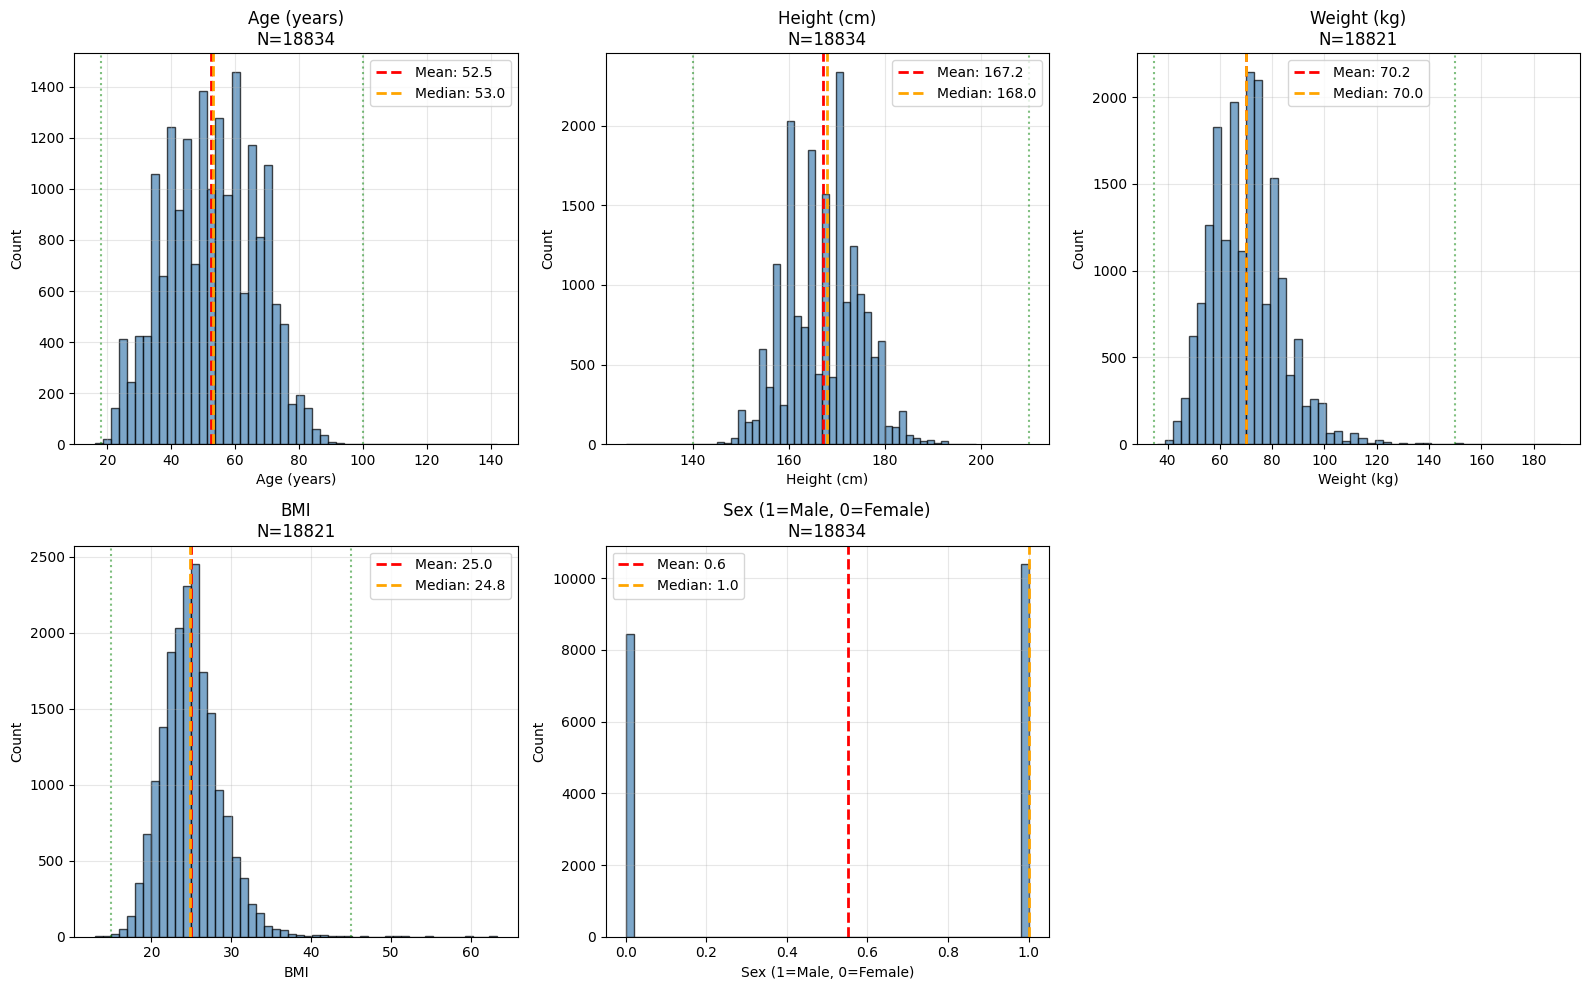

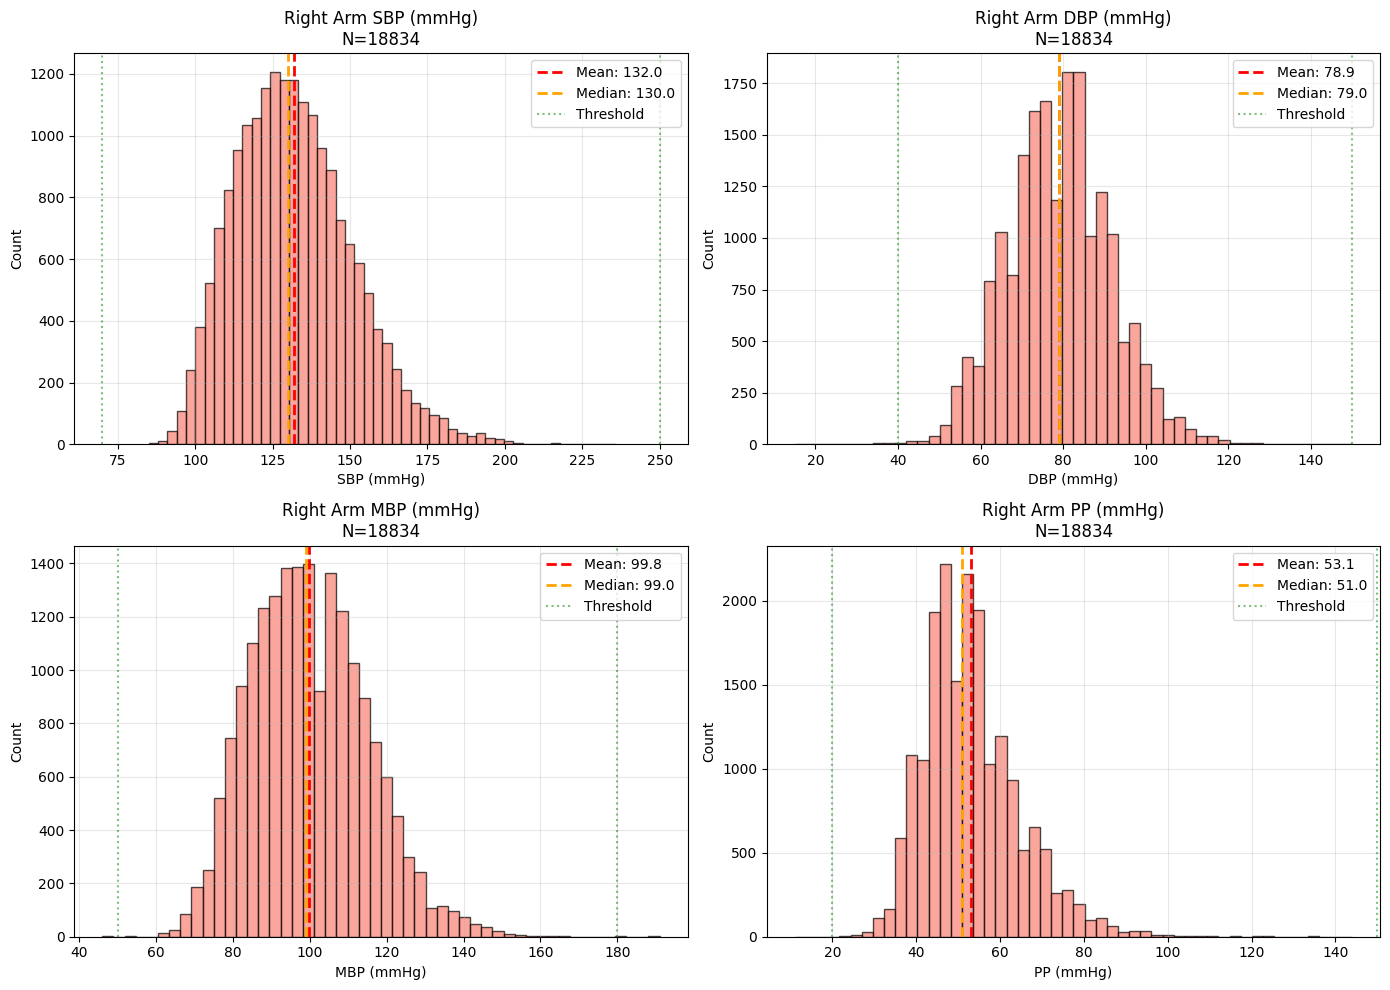

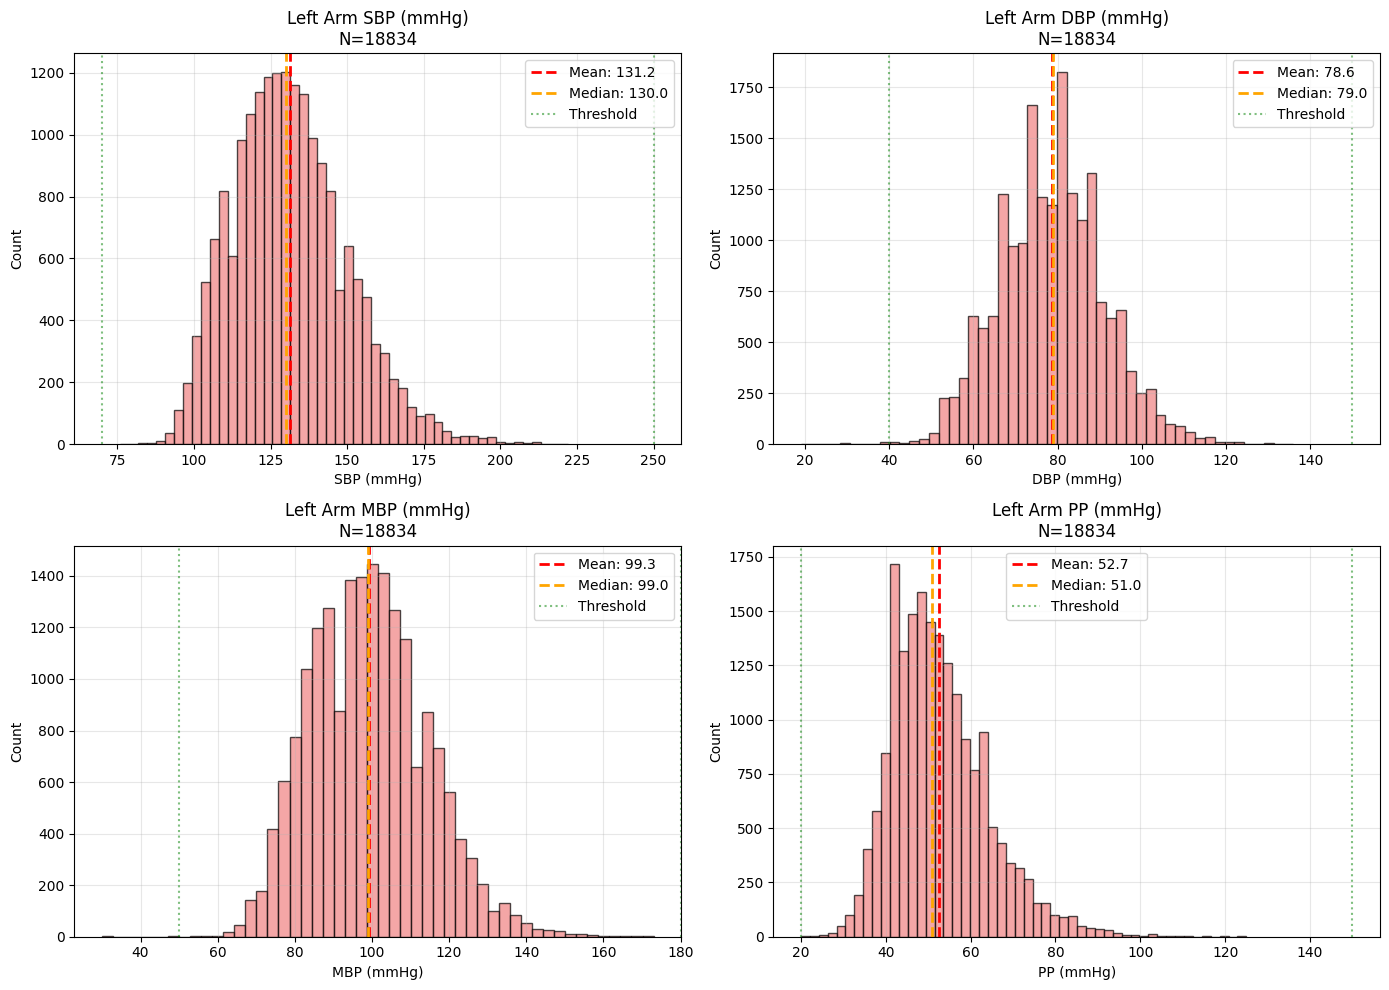

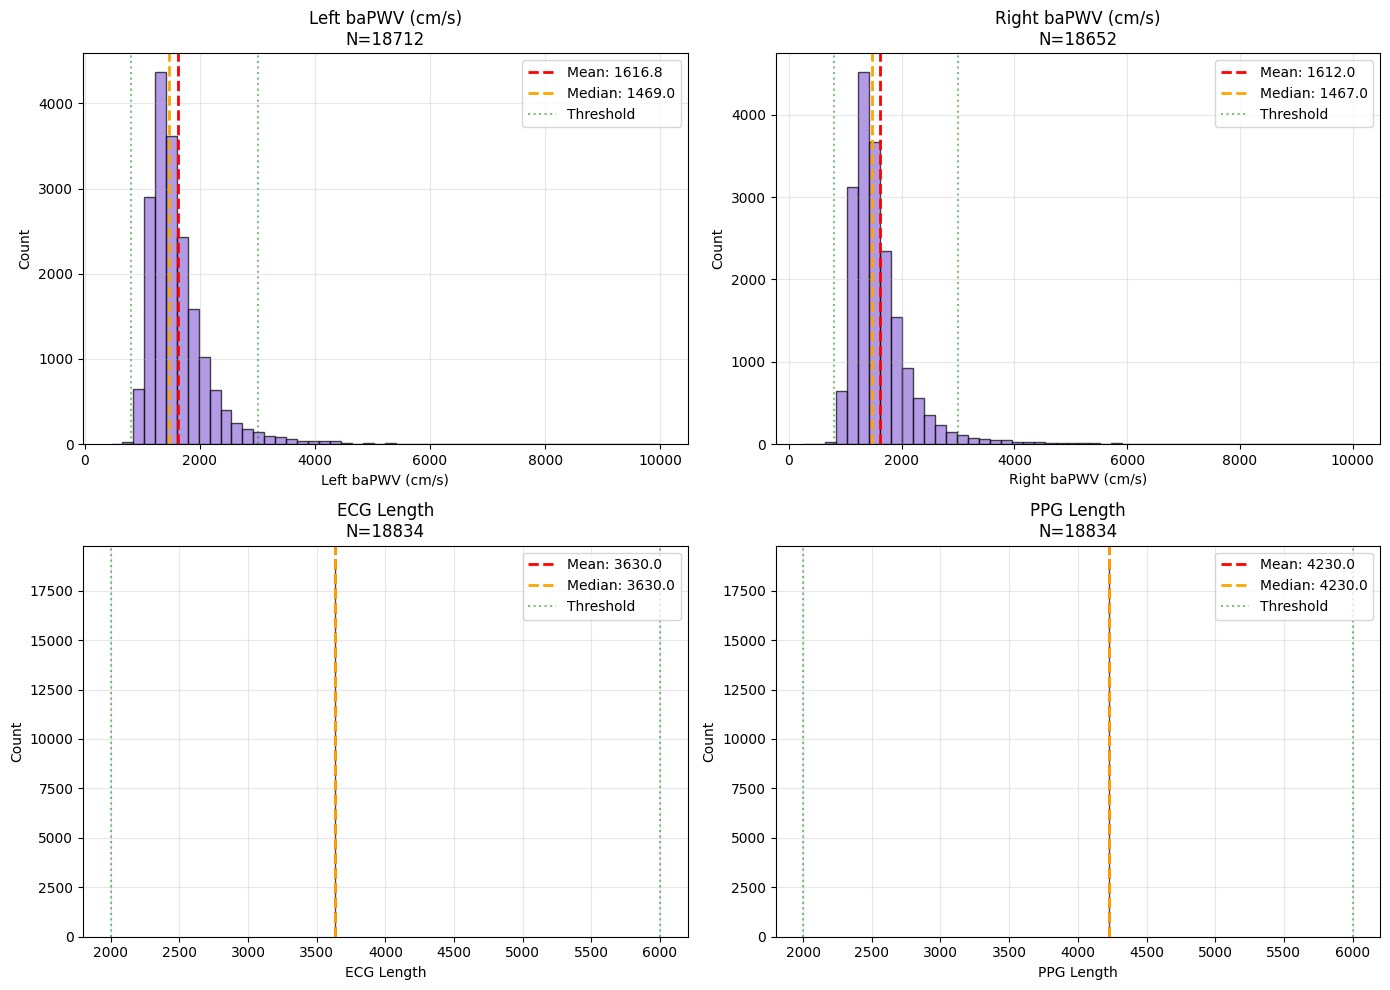


✓ Analysis complete! Check the generated PNG files.


In [26]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def analyze_distributions(h5_path):
    """Comprehensive distribution analysis with outlier detection"""
    
    print("=" * 70)
    print("COMPREHENSIVE DISTRIBUTION ANALYSIS")
    print("=" * 70)
    
    with h5py.File(h5_path, 'r') as f:
        n_samples = f.attrs['n_samples']
        
        # Load all metadata
        data = {
            'age': f['metadata/age'][:],
            'height': f['metadata/height'][:],
            'weight': f['metadata/weight'][:],
            'bmi': f['metadata/bmi'][:],
            'sex_encoded': f['metadata/sex_encoded'][:],
            'right_arm_sbp': f['metadata/right_arm_sbp'][:],
            'right_arm_dbp': f['metadata/right_arm_dbp'][:],
            'right_arm_mbp': f['metadata/right_arm_mbp'][:],
            'right_arm_pp': f['metadata/right_arm_pp'][:],
            'left_arm_sbp': f['metadata/left_arm_sbp'][:],
            'left_arm_dbp': f['metadata/left_arm_dbp'][:],
            'left_arm_mbp': f['metadata/left_arm_mbp'][:],
            'left_arm_pp': f['metadata/left_arm_pp'][:],
            'lbaPWV': f['metadata/lbaPWV'][:],
            'rbaPWV': f['metadata/rbaPWV'][:],
            'ecg_length': f['metadata/ecg_length'][:],
            'ppg_length': f['metadata/ppg_length'][:],
        }
    
    # Create DataFrame for easier analysis
    df = pd.DataFrame(data)
    
    # Define expected ranges for each variable
    ranges = {
        'age': (18, 100, 'years'),
        'height': (140, 210, 'cm'),
        'weight': (35, 150, 'kg'),
        'bmi': (15, 45, ''),
        'right_arm_sbp': (70, 250, 'mmHg'),
        'right_arm_dbp': (40, 150, 'mmHg'),
        'right_arm_mbp': (50, 180, 'mmHg'),
        'right_arm_pp': (20, 150, 'mmHg'),
        'left_arm_sbp': (70, 250, 'mmHg'),
        'left_arm_dbp': (40, 150, 'mmHg'),
        'left_arm_mbp': (50, 180, 'mmHg'),
        'left_arm_pp': (20, 150, 'mmHg'),
        'lbaPWV': (800, 3000, 'cm/s'),
        'rbaPWV': (800, 3000, 'cm/s'),
        'ecg_length': (2000, 6000, 'samples'),
        'ppg_length': (2000, 6000, 'samples'),
    }
    
    # Print detailed statistics
    print("\n" + "=" * 70)
    print("DETAILED STATISTICS FOR EACH VARIABLE")
    print("=" * 70)
    
    outlier_summary = []
    
    for var, (min_val, max_val, unit) in ranges.items():
        values = df[var].values
        
        # Remove NaN for statistics
        valid_values = values[~np.isnan(values)]
        n_valid = len(valid_values)
        n_nan = len(values) - n_valid
        
        if n_valid == 0:
            continue
        
        # Calculate statistics
        mean = np.mean(valid_values)
        std = np.std(valid_values)
        median = np.median(valid_values)
        q1 = np.percentile(valid_values, 25)
        q3 = np.percentile(valid_values, 75)
        
        # Detect outliers
        outliers = (values < min_val) | (values > max_val)
        n_outliers = np.sum(outliers)
        
        print(f"\n{var.upper()}")
        print(f"  Valid: {n_valid} ({n_valid/len(values)*100:.1f}%), NaN: {n_nan} ({n_nan/len(values)*100:.1f}%)")
        print(f"  Range: {valid_values.min():.1f} - {valid_values.max():.1f} {unit}")
        print(f"  Mean ± SD: {mean:.1f} ± {std:.1f} {unit}")
        print(f"  Median [Q1-Q3]: {median:.1f} [{q1:.1f} - {q3:.1f}] {unit}")
        print(f"  Expected range: {min_val} - {max_val} {unit}")
        print(f"  Outliers: {n_outliers} ({n_outliers/n_valid*100:.2f}%)")
        
        if n_outliers > 0:
            outlier_indices = np.where(outliers)[0][:5]
            print(f"  Examples: {[f'{values[i]:.1f}' for i in outlier_indices]}")
            
            outlier_summary.append({
                'variable': var,
                'n_outliers': n_outliers,
                'pct_outliers': n_outliers/n_valid*100
            })
    
    # Summary of outliers
    print("\n" + "=" * 70)
    print("OUTLIER SUMMARY")
    print("=" * 70)
    
    if outlier_summary:
        outlier_df = pd.DataFrame(outlier_summary)
        outlier_df = outlier_df.sort_values('n_outliers', ascending=False)
        print(outlier_df.to_string(index=False))
    else:
        print("No outliers detected!")
    
    # Create comprehensive visualization
    print("\nGenerating visualization...")
    
    # Figure 1: Demographics and Anthropometrics
    fig1, axes1 = plt.subplots(2, 3, figsize=(16, 10))
    
    vars_demo = ['age', 'height', 'weight', 'bmi', 'sex_encoded']
    titles = ['Age (years)', 'Height (cm)', 'Weight (kg)', 'BMI', 'Sex (1=Male, 0=Female)']
    
    for idx, (var, title) in enumerate(zip(vars_demo, titles)):
        row, col = idx // 3, idx % 3
        values = df[var].values
        valid_values = values[~np.isnan(values)]
        
        axes1[row, col].hist(valid_values, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
        axes1[row, col].axvline(np.mean(valid_values), color='red', linestyle='--', 
                                linewidth=2, label=f'Mean: {np.mean(valid_values):.1f}')
        axes1[row, col].axvline(np.median(valid_values), color='orange', linestyle='--', 
                                linewidth=2, label=f'Median: {np.median(valid_values):.1f}')
        
        if var in ranges:
            min_val, max_val, _ = ranges[var]
            axes1[row, col].axvline(min_val, color='green', linestyle=':', alpha=0.5)
            axes1[row, col].axvline(max_val, color='green', linestyle=':', alpha=0.5)
        
        axes1[row, col].set_xlabel(title)
        axes1[row, col].set_ylabel('Count')
        axes1[row, col].set_title(f'{title}\nN={len(valid_values)}')
        axes1[row, col].legend()
        axes1[row, col].grid(True, alpha=0.3)
    
    # Remove extra subplot
    fig1.delaxes(axes1[1, 2])
    
    plt.tight_layout()
    plt.savefig('distribution_demographics.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: distribution_demographics.png")
    
    # Figure 2: Blood Pressure - Right Arm
    fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))
    
    bp_vars = ['right_arm_sbp', 'right_arm_dbp', 'right_arm_mbp', 'right_arm_pp']
    bp_titles = ['SBP (mmHg)', 'DBP (mmHg)', 'MBP (mmHg)', 'PP (mmHg)']
    
    for idx, (var, title) in enumerate(zip(bp_vars, bp_titles)):
        row, col = idx // 2, idx % 2
        values = df[var].values
        valid_values = values[~np.isnan(values)]
        
        axes2[row, col].hist(valid_values, bins=50, edgecolor='black', alpha=0.7, color='salmon')
        axes2[row, col].axvline(np.mean(valid_values), color='red', linestyle='--', 
                                linewidth=2, label=f'Mean: {np.mean(valid_values):.1f}')
        axes2[row, col].axvline(np.median(valid_values), color='orange', linestyle='--', 
                                linewidth=2, label=f'Median: {np.median(valid_values):.1f}')
        
        if var in ranges:
            min_val, max_val, _ = ranges[var]
            axes2[row, col].axvline(min_val, color='green', linestyle=':', alpha=0.5, label='Threshold')
            axes2[row, col].axvline(max_val, color='green', linestyle=':', alpha=0.5)
        
        axes2[row, col].set_xlabel(title)
        axes2[row, col].set_ylabel('Count')
        axes2[row, col].set_title(f'Right Arm {title}\nN={len(valid_values)}')
        axes2[row, col].legend()
        axes2[row, col].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('distribution_bp_right.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: distribution_bp_right.png")
    
    # Figure 3: Blood Pressure - Left Arm
    fig3, axes3 = plt.subplots(2, 2, figsize=(14, 10))
    
    bp_vars_left = ['left_arm_sbp', 'left_arm_dbp', 'left_arm_mbp', 'left_arm_pp']
    bp_titles_left = ['SBP (mmHg)', 'DBP (mmHg)', 'MBP (mmHg)', 'PP (mmHg)']
    
    for idx, (var, title) in enumerate(zip(bp_vars_left, bp_titles_left)):
        row, col = idx // 2, idx % 2
        values = df[var].values
        valid_values = values[~np.isnan(values)]
        
        axes3[row, col].hist(valid_values, bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
        axes3[row, col].axvline(np.mean(valid_values), color='red', linestyle='--', 
                                linewidth=2, label=f'Mean: {np.mean(valid_values):.1f}')
        axes3[row, col].axvline(np.median(valid_values), color='orange', linestyle='--', 
                                linewidth=2, label=f'Median: {np.median(valid_values):.1f}')
        
        if var in ranges:
            min_val, max_val, _ = ranges[var]
            axes3[row, col].axvline(min_val, color='green', linestyle=':', alpha=0.5, label='Threshold')
            axes3[row, col].axvline(max_val, color='green', linestyle=':', alpha=0.5)
        
        axes3[row, col].set_xlabel(title)
        axes3[row, col].set_ylabel('Count')
        axes3[row, col].set_title(f'Left Arm {title}\nN={len(valid_values)}')
        axes3[row, col].legend()
        axes3[row, col].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('distribution_bp_left.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: distribution_bp_left.png")
    
    # Figure 4: PWV and Signal Lengths
    fig4, axes4 = plt.subplots(2, 2, figsize=(14, 10))
    
    other_vars = ['lbaPWV', 'rbaPWV', 'ecg_length', 'ppg_length']
    other_titles = ['Left baPWV (cm/s)', 'Right baPWV (cm/s)', 'ECG Length', 'PPG Length']
    
    for idx, (var, title) in enumerate(zip(other_vars, other_titles)):
        row, col = idx // 2, idx % 2
        values = df[var].values
        valid_values = values[~np.isnan(values)]
        
        axes4[row, col].hist(valid_values, bins=50, edgecolor='black', alpha=0.7, color='mediumpurple')
        axes4[row, col].axvline(np.mean(valid_values), color='red', linestyle='--', 
                                linewidth=2, label=f'Mean: {np.mean(valid_values):.1f}')
        axes4[row, col].axvline(np.median(valid_values), color='orange', linestyle='--', 
                                linewidth=2, label=f'Median: {np.median(valid_values):.1f}')
        
        if var in ranges:
            min_val, max_val, _ = ranges[var]
            axes4[row, col].axvline(min_val, color='green', linestyle=':', alpha=0.5, label='Threshold')
            axes4[row, col].axvline(max_val, color='green', linestyle=':', alpha=0.5)
        
        axes4[row, col].set_xlabel(title)
        axes4[row, col].set_ylabel('Count')
        axes4[row, col].set_title(f'{title}\nN={len(valid_values)}')
        axes4[row, col].legend()
        axes4[row, col].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('distribution_pwv_lengths.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: distribution_pwv_lengths.png")
    
    plt.show()
    
    print("\n" + "=" * 70)
    print("✓ Analysis complete! Check the generated PNG files.")
    print("=" * 70)

# Run analysis
h5_path = "/home/youliang/youliang_data2/bp/kailuan_dataset.h5"
analyze_distributions(h5_path)

COMPREHENSIVE OUTLIER REPORT

OUTLIER DETECTION BY VARIABLE

AGE
  Threshold: [18, 100]
  Total outliers: 8 (0.04%)
    - Too low (<18): 4
    - Too high (>100): 4
  Outlier range: 16.0 - 142.0
  Sample IDs (first 10):
    [446] T127685_20230511_091638_SHIBINGSHI_142_175_Male_11... = 142.0
    [960] FUHONGLIN_20220118_155618_FUHONGLIN_16_170_Male_60... = 16.0
    [2829] 6754871_20231024_083512_LUJUNLI_101_163_Female_58.... = 101.0
    [5543] 6504615_20231122_080031_PANGXIANG_102_176_Male_90.... = 102.0
    [5825] 003_20220118_154654_HUANGGEQING_16_173_Male_60.0_8... = 16.0
    [12022] 003_20220118_154239_HUANGGEQING_16_173_Male_60.0_8... = 16.0
    [17941] FM0128_20210418_112806_WANGAOYU_16_182_Male_80.0_8... = 16.0
    [18447] 6549380_20220930_084646_ZHUYU_103_189_Male_102.5_1... = 103.0

HEIGHT
  Threshold: [140, 210]
  Total outliers: 1 (0.01%)
    - Too low (<140): 1
    - Too high (>210): 0
  Outlier range: 126.0 - 126.0
  Sample IDs (first 10):
    [13837] 6507789_20210414_145523

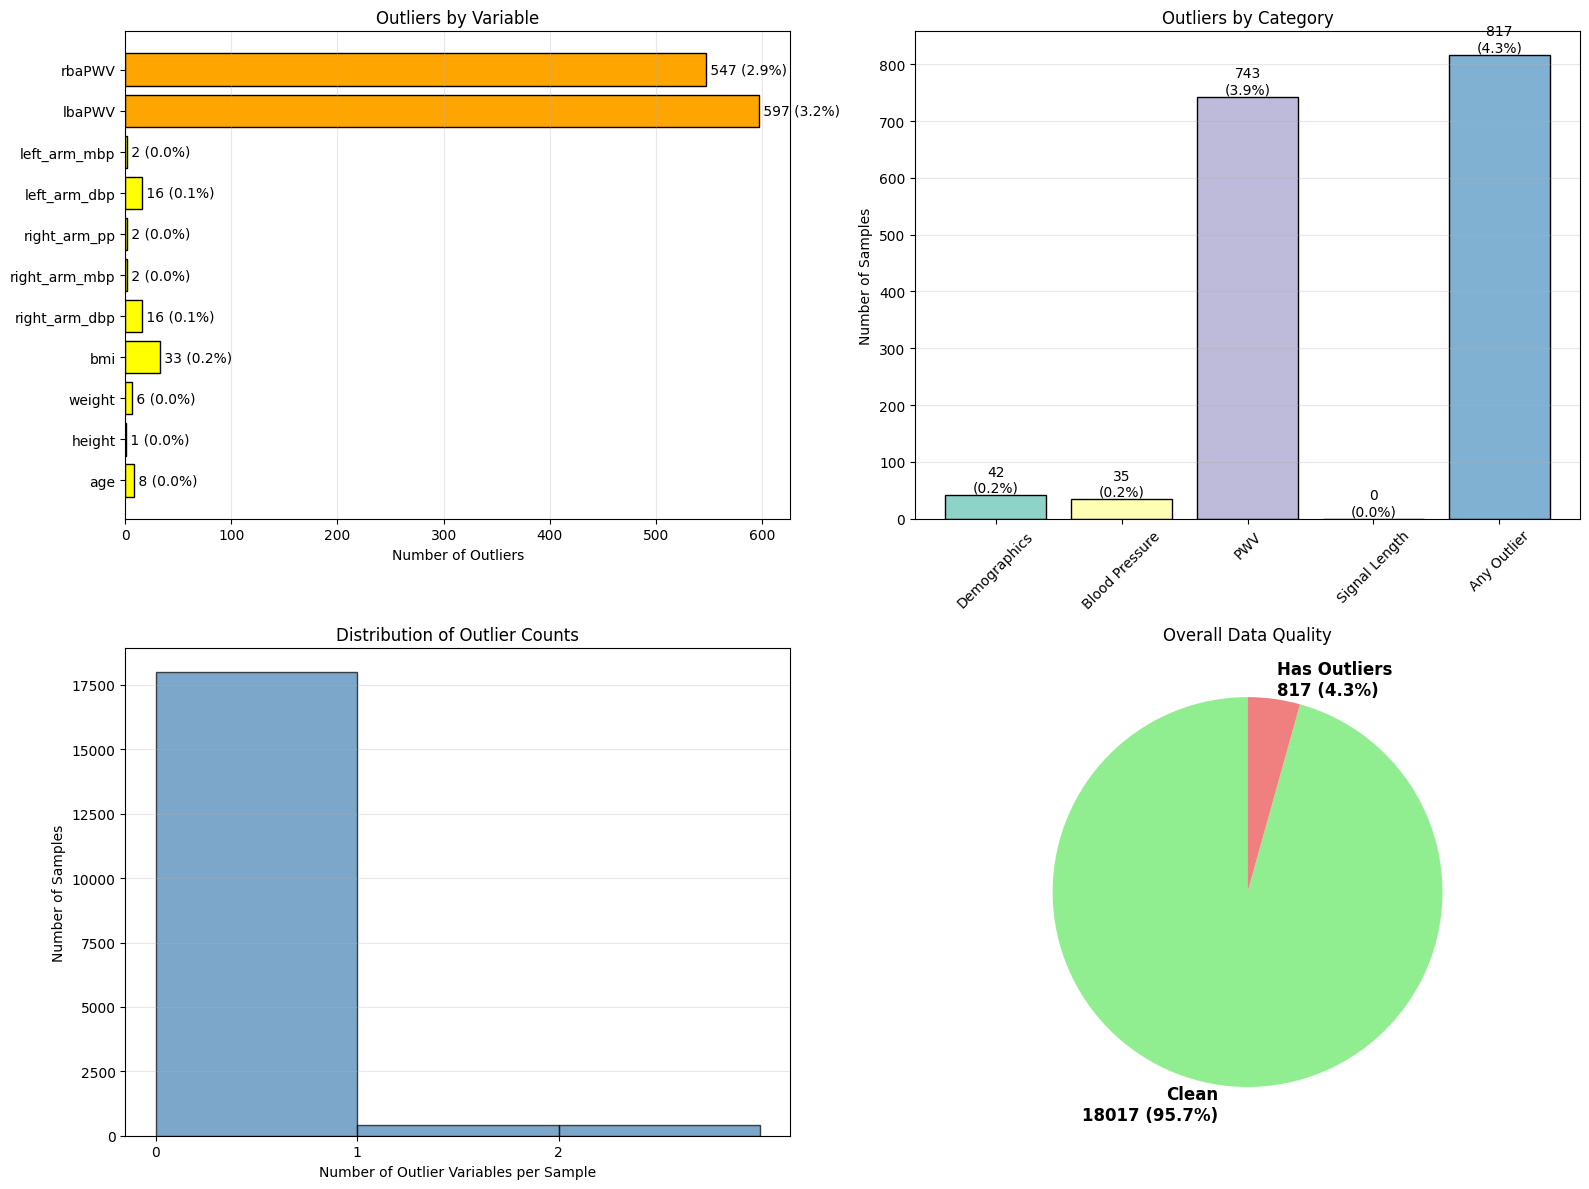


RECOMMENDATIONS

✓ Data quality is GOOD (1-5% outliers)
  → Consider keeping outliers for robustness, or remove for cleaner data

To create a cleaned dataset, you would remove 817 samples
Resulting dataset size: 18017 samples

SAVING OUTLIER INDICES
✓ Saved outlier mask to: outlier_mask.npy
  Load with: outlier_mask = np.load('outlier_mask.npy')


In [27]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_outlier_report(h5_path):
    """Generate comprehensive outlier report"""
    
    print("=" * 80)
    print("COMPREHENSIVE OUTLIER REPORT")
    print("=" * 80)
    
    with h5py.File(h5_path, 'r') as f:
        n_samples = f.attrs['n_samples']
        
        # Load all metadata
        data = {
            'age': f['metadata/age'][:],
            'height': f['metadata/height'][:],
            'weight': f['metadata/weight'][:],
            'bmi': f['metadata/bmi'][:],
            'right_arm_sbp': f['metadata/right_arm_sbp'][:],
            'right_arm_dbp': f['metadata/right_arm_dbp'][:],
            'right_arm_mbp': f['metadata/right_arm_mbp'][:],
            'right_arm_pp': f['metadata/right_arm_pp'][:],
            'left_arm_sbp': f['metadata/left_arm_sbp'][:],
            'left_arm_dbp': f['metadata/left_arm_dbp'][:],
            'left_arm_mbp': f['metadata/left_arm_mbp'][:],
            'left_arm_pp': f['metadata/left_arm_pp'][:],
            'lbaPWV': f['metadata/lbaPWV'][:],
            'rbaPWV': f['metadata/rbaPWV'][:],
            'ecg_length': f['metadata/ecg_length'][:],
            'ppg_length': f['metadata/ppg_length'][:],
            'new_id': f['metadata/new_id'][:],
        }
    
    df = pd.DataFrame(data)
    
    # Define thresholds (min, max)
    thresholds = {
        'age': (18, 100),
        'height': (140, 210),
        'weight': (35, 150),
        'bmi': (15, 45),
        'right_arm_sbp': (70, 250),
        'right_arm_dbp': (40, 150),
        'right_arm_mbp': (50, 180),
        'right_arm_pp': (20, 150),
        'left_arm_sbp': (70, 250),
        'left_arm_dbp': (40, 150),
        'left_arm_mbp': (50, 180),
        'left_arm_pp': (20, 150),
        'lbaPWV': (800, 3000),
        'rbaPWV': (800, 3000),
        'ecg_length': (2000, 6000),
        'ppg_length': (2000, 6000),
    }
    
    # Detect outliers for each variable
    outlier_masks = {}
    outlier_details = []
    
    print("\n" + "=" * 80)
    print("OUTLIER DETECTION BY VARIABLE")
    print("=" * 80)
    
    for var, (min_val, max_val) in thresholds.items():
        values = df[var].values
        
        # Create outlier mask
        outlier_mask = (values < min_val) | (values > max_val)
        n_outliers = np.sum(outlier_mask)
        
        outlier_masks[var] = outlier_mask
        
        if n_outliers > 0:
            pct = n_outliers / len(values) * 100
            
            # Get outlier statistics
            outlier_values = values[outlier_mask]
            too_low = np.sum(values < min_val)
            too_high = np.sum(values > max_val)
            
            print(f"\n{var.upper()}")
            print(f"  Threshold: [{min_val}, {max_val}]")
            print(f"  Total outliers: {n_outliers} ({pct:.2f}%)")
            print(f"    - Too low (<{min_val}): {too_low}")
            print(f"    - Too high (>{max_val}): {too_high}")
            print(f"  Outlier range: {outlier_values.min():.1f} - {outlier_values.max():.1f}")
            
            # Show examples
            outlier_indices = np.where(outlier_mask)[0][:10]
            print(f"  Sample IDs (first 10):")
            for idx in outlier_indices:
                sample_id = df.iloc[idx]['new_id']
                if isinstance(sample_id, bytes):
                    sample_id = sample_id.decode('utf-8')
                print(f"    [{idx}] {sample_id[:50]}... = {values[idx]:.1f}")
            
            outlier_details.append({
                'variable': var,
                'n_outliers': n_outliers,
                'pct_outliers': pct,
                'too_low': too_low,
                'too_high': too_high,
                'min_outlier': outlier_values.min(),
                'max_outlier': outlier_values.max()
            })
    
    # Combined outlier analysis
    print("\n" + "=" * 80)
    print("COMBINED OUTLIER ANALYSIS")
    print("=" * 80)
    
    # Create combined masks by category
    demographic_outliers = (
        outlier_masks['age'] | 
        outlier_masks['height'] | 
        outlier_masks['weight'] | 
        outlier_masks['bmi']
    )
    
    bp_outliers = (
        outlier_masks['right_arm_sbp'] | outlier_masks['right_arm_dbp'] |
        outlier_masks['right_arm_mbp'] | outlier_masks['right_arm_pp'] |
        outlier_masks['left_arm_sbp'] | outlier_masks['left_arm_dbp'] |
        outlier_masks['left_arm_mbp'] | outlier_masks['left_arm_pp']
    )
    
    pwv_outliers = outlier_masks['lbaPWV'] | outlier_masks['rbaPWV']
    
    signal_outliers = outlier_masks['ecg_length'] | outlier_masks['ppg_length']
    
    # Any outlier
    any_outlier = (
        demographic_outliers | bp_outliers | pwv_outliers | signal_outliers
    )
    
    print(f"\nOutliers by Category:")
    print(f"  Demographics (age/height/weight/BMI): {demographic_outliers.sum()} ({demographic_outliers.sum()/n_samples*100:.2f}%)")
    print(f"  Blood Pressure: {bp_outliers.sum()} ({bp_outliers.sum()/n_samples*100:.2f}%)")
    print(f"  PWV: {pwv_outliers.sum()} ({pwv_outliers.sum()/n_samples*100:.2f}%)")
    print(f"  Signal Length: {signal_outliers.sum()} ({signal_outliers.sum()/n_samples*100:.2f}%)")
    print(f"\n  ANY OUTLIER: {any_outlier.sum()} ({any_outlier.sum()/n_samples*100:.2f}%)")
    print(f"  CLEAN SAMPLES: {(~any_outlier).sum()} ({(~any_outlier).sum()/n_samples*100:.2f}%)")
    
    # Samples with multiple outliers
    outlier_count = sum(outlier_masks.values())
    multiple_outliers = outlier_count > 1
    
    print(f"\nSamples with multiple outlier variables:")
    print(f"  2+ variables: {np.sum(outlier_count >= 2)} ({np.sum(outlier_count >= 2)/n_samples*100:.2f}%)")
    print(f"  3+ variables: {np.sum(outlier_count >= 3)} ({np.sum(outlier_count >= 3)/n_samples*100:.2f}%)")
    print(f"  5+ variables: {np.sum(outlier_count >= 5)} ({np.sum(outlier_count >= 5)/n_samples*100:.2f}%)")
    
    # Create summary table
    print("\n" + "=" * 80)
    print("OUTLIER SUMMARY TABLE")
    print("=" * 80)
    
    if outlier_details:
        outlier_df = pd.DataFrame(outlier_details)
        outlier_df = outlier_df.sort_values('n_outliers', ascending=False)
        print("\n" + outlier_df.to_string(index=False))
    
    # Visualization
    print("\nGenerating outlier visualization...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Outliers by variable
    ax1 = axes[0, 0]
    outlier_counts = [d['n_outliers'] for d in outlier_details]
    var_names = [d['variable'] for d in outlier_details]
    
    colors = ['red' if c > n_samples * 0.05 else 'orange' if c > n_samples * 0.01 else 'yellow' 
              for c in outlier_counts]
    
    bars = ax1.barh(var_names, outlier_counts, color=colors, edgecolor='black')
    ax1.set_xlabel('Number of Outliers')
    ax1.set_title('Outliers by Variable')
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Add percentage labels
    for i, (bar, count) in enumerate(zip(bars, outlier_counts)):
        pct = count / n_samples * 100
        ax1.text(count, bar.get_y() + bar.get_height()/2, 
                f' {count} ({pct:.1f}%)', va='center')
    
    # Plot 2: Category breakdown
    ax2 = axes[0, 1]
    categories = ['Demographics', 'Blood Pressure', 'PWV', 'Signal Length', 'Any Outlier']
    category_counts = [
        demographic_outliers.sum(),
        bp_outliers.sum(),
        pwv_outliers.sum(),
        signal_outliers.sum(),
        any_outlier.sum()
    ]
    
    colors2 = plt.cm.Set3(range(len(categories)))
    bars2 = ax2.bar(categories, category_counts, color=colors2, edgecolor='black')
    ax2.set_ylabel('Number of Samples')
    ax2.set_title('Outliers by Category')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3, axis='y')
    
    for bar, count in zip(bars2, category_counts):
        pct = count / n_samples * 100
        ax2.text(bar.get_x() + bar.get_width()/2, count,
                f'{count}\n({pct:.1f}%)', ha='center', va='bottom')
    
    # Plot 3: Distribution of outlier counts per sample
    ax3 = axes[1, 0]
    ax3.hist(outlier_count, bins=range(0, int(outlier_count.max())+2), 
            edgecolor='black', alpha=0.7, color='steelblue')
    ax3.set_xlabel('Number of Outlier Variables per Sample')
    ax3.set_ylabel('Number of Samples')
    ax3.set_title('Distribution of Outlier Counts')
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.set_xticks(range(0, int(outlier_count.max())+1))
    
    # Plot 4: Clean vs Outlier pie chart
    ax4 = axes[1, 1]
    sizes = [(~any_outlier).sum(), any_outlier.sum()]
    labels = [f'Clean\n{(~any_outlier).sum()} ({(~any_outlier).sum()/n_samples*100:.1f}%)',
              f'Has Outliers\n{any_outlier.sum()} ({any_outlier.sum()/n_samples*100:.1f}%)']
    colors4 = ['lightgreen', 'lightcoral']
    
    ax4.pie(sizes, labels=labels, colors=colors4, autopct='', startangle=90,
           textprops={'fontsize': 12, 'weight': 'bold'})
    ax4.set_title('Overall Data Quality')
    
    plt.tight_layout()
    plt.savefig('outlier_report.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: outlier_report.png")
    
    plt.show()
    
    # Recommendations
    print("\n" + "=" * 80)
    print("RECOMMENDATIONS")
    print("=" * 80)
    
    total_outlier_pct = any_outlier.sum() / n_samples * 100
    
    if total_outlier_pct < 1:
        print("\n✓ Data quality is EXCELLENT (<1% outliers)")
        print("  → You can proceed with training on the full dataset")
    elif total_outlier_pct < 5:
        print("\n✓ Data quality is GOOD (1-5% outliers)")
        print("  → Consider keeping outliers for robustness, or remove for cleaner data")
    elif total_outlier_pct < 10:
        print("\n⚠ Data quality is MODERATE (5-10% outliers)")
        print("  → Recommended to create a cleaned dataset")
    else:
        print("\n⚠ Data quality needs attention (>10% outliers)")
        print("  → Strongly recommend creating a cleaned dataset")
        print("  → Consider reviewing data collection/processing pipeline")
    
    print(f"\nTo create a cleaned dataset, you would remove {any_outlier.sum()} samples")
    print(f"Resulting dataset size: {(~any_outlier).sum()} samples")
    
    return any_outlier, outlier_masks

# Run analysis
h5_path = "/home/youliang/youliang_data2/bp/kailuan_dataset.h5"
any_outlier_mask, individual_masks = generate_outlier_report(h5_path)

# Save outlier information
print("\n" + "=" * 80)
print("SAVING OUTLIER INDICES")
print("=" * 80)

np.save('outlier_mask.npy', any_outlier_mask)
print(f"✓ Saved outlier mask to: outlier_mask.npy")
print(f"  Load with: outlier_mask = np.load('outlier_mask.npy')")

Total samples: 18834
Calibration removed: 600 samples

✓ Saved: dataset_visualization.png


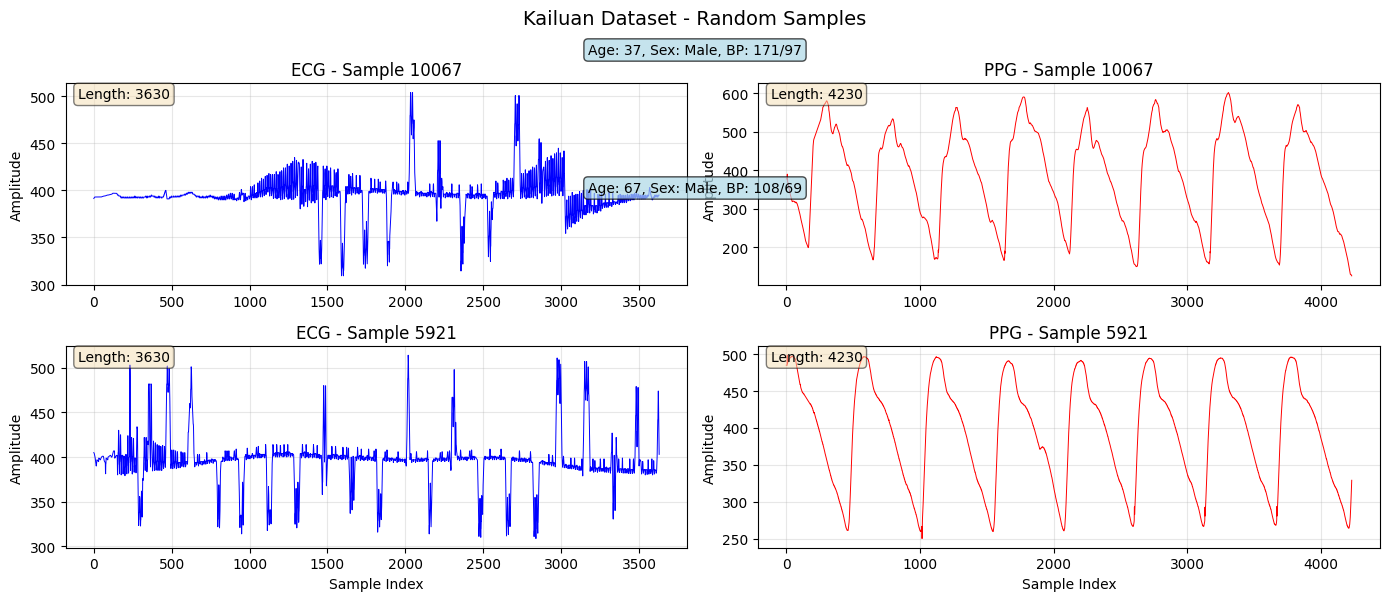

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def simple_visualization(h5_path):
    """Simple visualization of the dataset"""
    
    with h5py.File(h5_path, 'r') as f:
        
        print(f"Total samples: {f.attrs['n_samples']}")
        print(f"Calibration removed: {f.attrs['calibration_threshold']} samples\n")
        
        # Pick 2 random samples
        np.random.seed(42)
        indices = np.random.choice(f.attrs['n_samples'], 2, replace=False)
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 6))
        
        for i, idx in enumerate(indices):
            # Load data
            ecg = f['signals/ecg'][idx]
            ppg = f['signals/ppg'][idx]
            
            age = f['metadata/age'][idx]
            sex = f['metadata/sex'][idx]
            if isinstance(sex, bytes):
                sex = sex.decode('utf-8')
            sbp = f['metadata/right_arm_sbp'][idx]
            dbp = f['metadata/right_arm_dbp'][idx]
            
            # Plot ECG
            axes[i, 0].plot(ecg, linewidth=0.7, color='blue')
            axes[i, 0].set_title(f'ECG - Sample {idx}')
            axes[i, 0].set_ylabel('Amplitude')
            axes[i, 0].grid(True, alpha=0.3)
            axes[i, 0].text(0.02, 0.98, f'Length: {len(ecg)}', 
                           transform=axes[i, 0].transAxes, 
                           verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            
            # Plot PPG
            axes[i, 1].plot(ppg, linewidth=0.7, color='red')
            axes[i, 1].set_title(f'PPG - Sample {idx}')
            axes[i, 1].set_ylabel('Amplitude')
            axes[i, 1].grid(True, alpha=0.3)
            axes[i, 1].text(0.02, 0.98, f'Length: {len(ppg)}', 
                           transform=axes[i, 1].transAxes, 
                           verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            
            # Add info
            info = f'Age: {age:.0f}, Sex: {sex}, BP: {sbp:.0f}/{dbp:.0f}'
            fig.text(0.5, 0.92 - i*0.23, info, ha='center', fontsize=10, 
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
        
        axes[-1, 0].set_xlabel('Sample Index')
        axes[-1, 1].set_xlabel('Sample Index')
        
        plt.suptitle('Kailuan Dataset - Random Samples', fontsize=14, y=0.995)
        plt.tight_layout(rect=[0, 0, 1, 0.99])
        plt.savefig('dataset_visualization.png', dpi=150, bbox_inches='tight')
        print("✓ Saved: dataset_visualization.png")
        plt.show()

# Run
h5_path = "/home/youliang/youliang_data2/bp/kailuan_dataset.h5"
simple_visualization(h5_path)

# See py

In [1]:
import h5py

with h5py.File('kailuan_dataset.h5', 'r') as f:
    print(list(f.keys()))

['metadata', 'signals']


In [2]:
with h5py.File('/home/youliang/youliang_data2/bp/kailuan_dataset.h5', 'r') as f:
    # Print all top-level keys
    print("Top-level groups/datasets:")
    print(list(f.keys()))
    
    # Explore the structure
    def explore_h5(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"  Dataset: {name}, Shape: {obj.shape}, Dtype: {obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"  Group: {name}/")
    
    f.visititems(explore_h5)
    
    # If there's a 'metadata' group, explore it
    if 'metadata' in f:
        print("\nMetadata keys:", list(f['metadata'].keys()))
    
    # If there's a 'signals' group, explore it
    if 'signals' in f:
        print("Signals keys:", list(f['signals'].keys()))

Top-level groups/datasets:
['metadata', 'signals']
  Group: metadata/
  Dataset: metadata/abdomen_circumference, Shape: (18834,), Dtype: float32
  Dataset: metadata/age, Shape: (18834,), Dtype: float32
  Dataset: metadata/bmi, Shape: (18834,), Dtype: float32
  Dataset: metadata/ecg_length, Shape: (18834,), Dtype: float32
  Dataset: metadata/height, Shape: (18834,), Dtype: float32
  Dataset: metadata/lbaPWV, Shape: (18834,), Dtype: float32
  Dataset: metadata/left_arm_dbp, Shape: (18834,), Dtype: float32
  Dataset: metadata/left_arm_mbp, Shape: (18834,), Dtype: float32
  Dataset: metadata/left_arm_pp, Shape: (18834,), Dtype: float32
  Dataset: metadata/left_arm_sbp, Shape: (18834,), Dtype: float32
  Dataset: metadata/name, Shape: (18834,), Dtype: object
  Dataset: metadata/new_id, Shape: (18834,), Dtype: object
  Dataset: metadata/ppg_length, Shape: (18834,), Dtype: float32
  Dataset: metadata/rbaPWV, Shape: (18834,), Dtype: float32
  Dataset: metadata/record_time, Shape: (18834,), Dtyp

In [3]:
import h5py
import numpy as np

with h5py.File('/home/youliang/youliang_data2/bp/kailuan_dataset.h5', 'r') as f:
    ecg_data = f['signals/ecg']
    ppg_data = f['signals/ppg']
    
    # Check a few examples
    print("ECG signal shapes (first 5 samples):")
    for i in range(5):
        print(f"  Sample {i}: {ecg_data[i].shape}, dtype: {ecg_data[i].dtype}")
    
    print("\nPPG signal shapes (first 5 samples):")
    for i in range(5):
        print(f"  Sample {i}: {ppg_data[i].shape}, dtype: {ppg_data[i].dtype}")
    
    # Check min/max lengths
    ecg_lengths = [len(ecg_data[i]) for i in range(len(ecg_data))]
    ppg_lengths = [len(ppg_data[i]) for i in range(len(ppg_data))]
    
    print(f"\nECG: min={min(ecg_lengths)}, max={max(ecg_lengths)}, mean={np.mean(ecg_lengths):.1f}")
    print(f"PPG: min={min(ppg_lengths)}, max={max(ppg_lengths)}, mean={np.mean(ppg_lengths):.1f}")

ECG signal shapes (first 5 samples):
  Sample 0: (3630,), dtype: float32
  Sample 1: (3630,), dtype: float32
  Sample 2: (3630,), dtype: float32
  Sample 3: (3630,), dtype: float32
  Sample 4: (3630,), dtype: float32

PPG signal shapes (first 5 samples):
  Sample 0: (4230,), dtype: float32
  Sample 1: (4230,), dtype: float32
  Sample 2: (4230,), dtype: float32
  Sample 3: (4230,), dtype: float32
  Sample 4: (4230,), dtype: float32

ECG: min=3630, max=3630, mean=3630.0
PPG: min=4230, max=4230, mean=4230.0


In [1]:
import numpy as np
import os

npz_dir = '/home/youliang/youliang_data2/bp/bp_npz_run1/npz'
files = os.listdir(npz_dir)
print(f"Total files: {len(files)}")
print(f"First few files: {files[:5]}")

# 读一个文件看看
if files:
    sample = np.load(os.path.join(npz_dir, files[0]))
    print(f"Keys in {files[0]}: {list(sample.keys())}")
    for key in sample.keys():
        print(f"  {key}: shape={sample[key].shape}, dtype={sample[key].dtype}")

Total files: 18834
First few files: ['6533094_20231027_083709_WANGGUIJUAN_50_160_Female_60.0_80_23.4_1645_1611_139_117_91_48_141_116_92_49.npz', '6536927_20210802_074659_HANYANDONG_50_178_Male_80.0_86_25.2_1615_1574_124_99_78_46_126_99_83_43.npz', '71889_20231220_072819_LIUXIANGHUI_43_170_Male_70.0_90_24.2_1397_1398_123_98_79_44_121_92_73_48.npz', '6500981_20220127_080624_HOUZHANYOU_55_164_Male_76.0_93_28.3_1307_1344_125_90_72_53_106_80_68_38.npz', '6559002_20240622_093233_weiguilan_66_160_Female_63.0_80_24.6_1919_2232_145_118_87_58_137_109_85_52.npz']
Keys in 6533094_20231027_083709_WANGGUIJUAN_50_160_Female_60.0_80_23.4_1645_1611_139_117_91_48_141_116_92_49.npz: ['x']
  x: shape=(7500, 2), dtype=float32
